<a href="https://colab.research.google.com/github/rishitharaj/Iris-Clustering-Project/blob/main/Clustering_Algorithm_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:**
The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.

**Dataset**
Use the Iris dataset available in the sklearn library.

*Timely Submission (1 mark)
Submission Guidelines Provide your code in a Jupyter Notebook format and submit the GitHub link here.
Ensure your explanations and answers are clear and concise.
Total Score: 10*

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')


**Loading and Preprocessing**
- Load the Iris dataset from sklearn.
- Drop the species column since this is a clustering problem.


In [4]:
# Load the Iris dataset
iris = load_iris()
X = iris.data.copy()   # numeric features
feature_names = iris.feature_names
y_true = iris.target.copy()        # true labels (kept only for later evaluation/comparison)

# Create DataFrame for easy inspection
df = pd.DataFrame(X, columns=feature_names)
# Add species for reference (will drop it for clustering inputs)
df['species'] = pd.Categorical.from_codes(y_true, iris.target_names)

# Show first 5 rows
print("First 5 rows of the dataset (with species column for reference):")
print(df.head())

First 5 rows of the dataset (with species column for reference):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [9]:
df.info() #overview of the table to see if there are null value and see the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [6]:
# Prepare data for clustering: drop species column
X_clust = df.drop(columns=['species']).values

# Standardize features (important for distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)

# Quick sanity check
print('\nMeans after scaling (should be ~0):', np.round(X_scaled.mean(axis=0), 6))
print('Std dev after scaling (should be 1):', np.round(X_scaled.std(axis=0), 6))




Means after scaling (should be ~0): [-0. -0. -0. -0.]
Std dev after scaling (should be 1): [1. 1. 1. 1.]


In [7]:
X.shape

(150, 4)

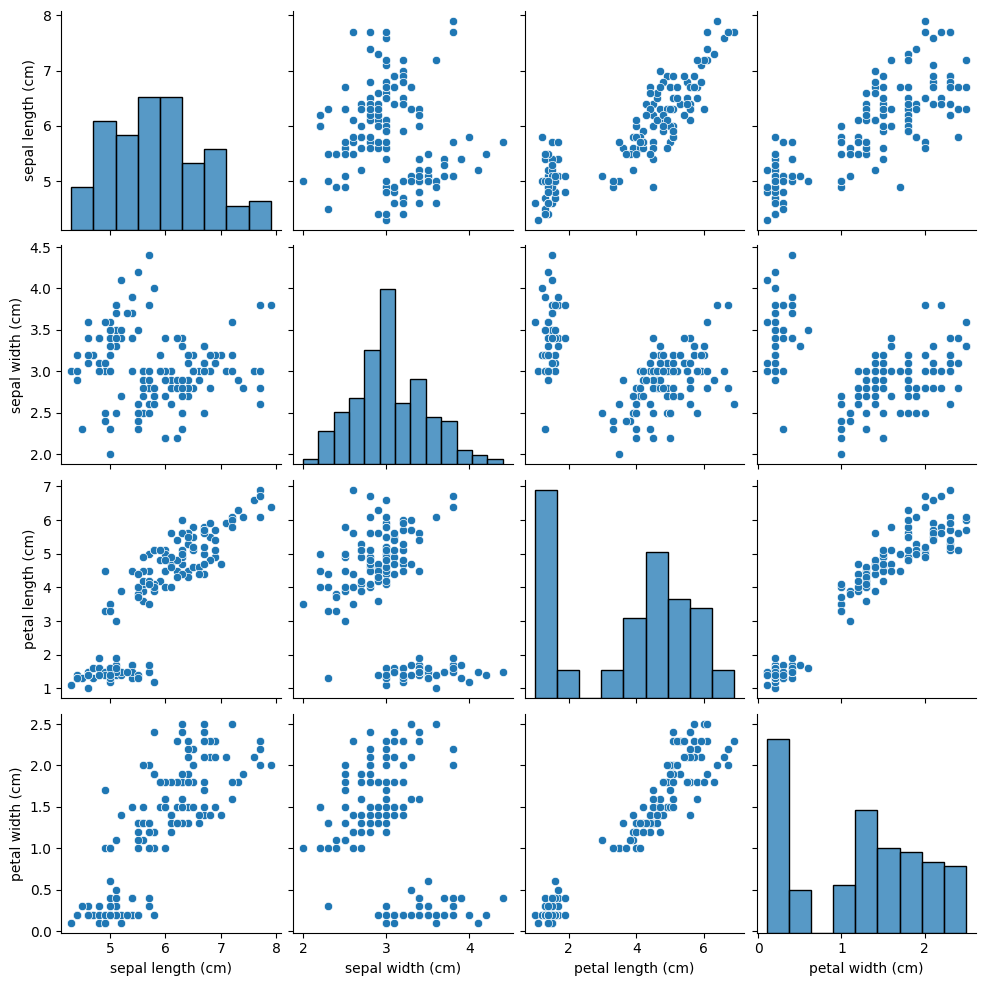

In [11]:
sns.pairplot(df) #a quickview of how the data are related

#**Clustering Algorithm Implementation:**
Implement the following two clustering algorithms:

##**1. KMeans Clustering**:
- Provide a brief description of how KMeans clustering works.
- Explain why KMeans clustering might be suitable for the Iris dataset.
- Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.

**Description**

- KMeans is a centroid-based clustering algorithm.
- It chooses k cluster centers, assigns each point to the nearest center, then updates the centers repeatedly till convergence is reached.

**KMeans is Suitable for Iris Dataset**

- Iris dataset has well-separated numeric features.
- Natural grouping exists (setosa, versicolor, virginica).
- KMeans handles low-dimensional, continuous data very well.

In [ ]:
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [12]:
# import sklearn
# print(sklearn.__version__)

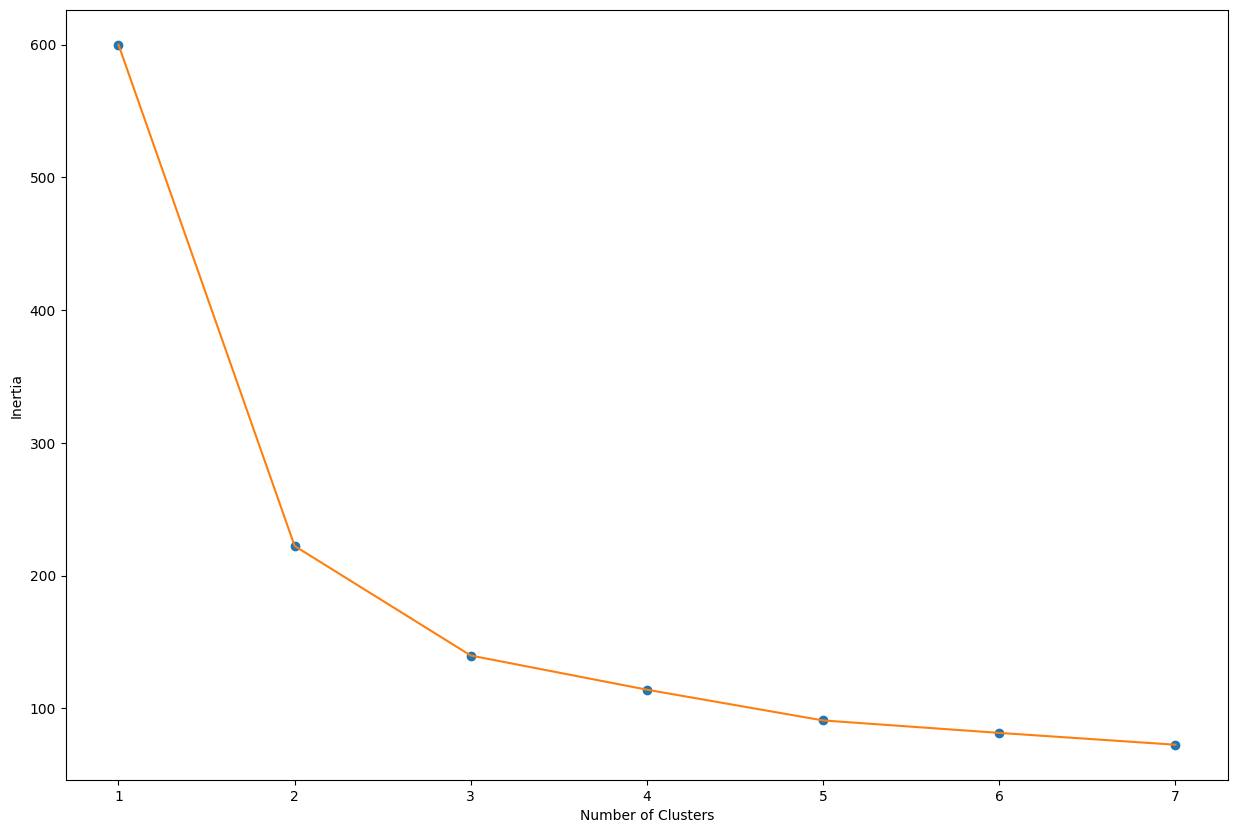

In [28]:
# Elbow method to pick best value for k
inertia = []
for n in range(1 , 8):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
                n_init =10, #n_init is important value to figure the best k value
               random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(1 , figsize = (15, 10))
plt.plot(np.arange(1 , 8) , inertia , 'o')
plt.plot(np.arange(1 , 8) , inertia , '-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


In [18]:
# As per the graph, 3 is the point at which the transition happens

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print('Cluster counts (KMeans):')
print(pd.Series(kmeans_labels).value_counts().sort_index())

# Evaluate clustering quality
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
print(f"Silhouette score (KMeans): {sil_kmeans:.4f}")
print(f"Adjusted Rand Index vs true species (KMeans): {ari_kmeans:.4f}")



Cluster counts (KMeans):
0    53
1    50
2    47
Name: count, dtype: int64
Silhouette score (KMeans): 0.4599
Adjusted Rand Index vs true species (KMeans): 0.6201


In [ ]:
model = KMeans(n_clusters = 3,
            init='k-means++',
            max_iter=500,
            random_state=42)
model.fit(X_scaled)
labels = model.labels_
#centroids = model.cluster_centers_



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,versicolor
1,4.9,3.0,1.4,0.2,virginica
2,4.7,3.2,1.3,0.2,virginica
3,4.6,3.1,1.5,0.2,virginica
4,5.0,3.6,1.4,0.2,versicolor


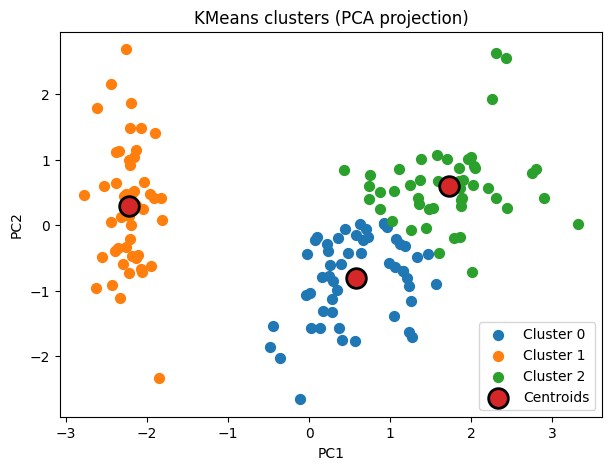

In [27]:
# Visualize clusters using PCA (2D projection)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
for label in np.unique(kmeans_labels):
    mask = kmeans_labels == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Cluster {label}', s=50)

# plot centroids in PCA space (transform centroids from original scaled space)
centroids_scaled = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids_scaled)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='o', s=200, linewidths=2, edgecolors='k', label='Centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans clusters (PCA projection)')
plt.legend()
plt.show()

## **2. Hierarchical Clustering (4 marks):**
- Provide a brief description of how Hierarchical clustering works.
- Explain why Hierarchical clustering might be suitable for the Iris dataset.
- Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.


**Description:**
Hierarchical clustering builds a nested hierarchy (tree) of clusters. In agglomerative (bottom-up) clustering, each point starts as its own cluster and the algorithm repeatedly merges the two closest clusters until a single cluster remains. The result can be visualized as a dendrogram. Different linkage methods (single, complete, average, ward) control how distance between clusters is measured.


**Suitable for Iris Dataset:**
  Hierarchical clustering provides a dendrogram that helps visualize how clusters agglomerate at different distance thresholds. For Iris, which has known subgroup structure, hierarchical clustering can reveal
  cluster relationships and is robust to discovering cluster structure without specifying k upfront.


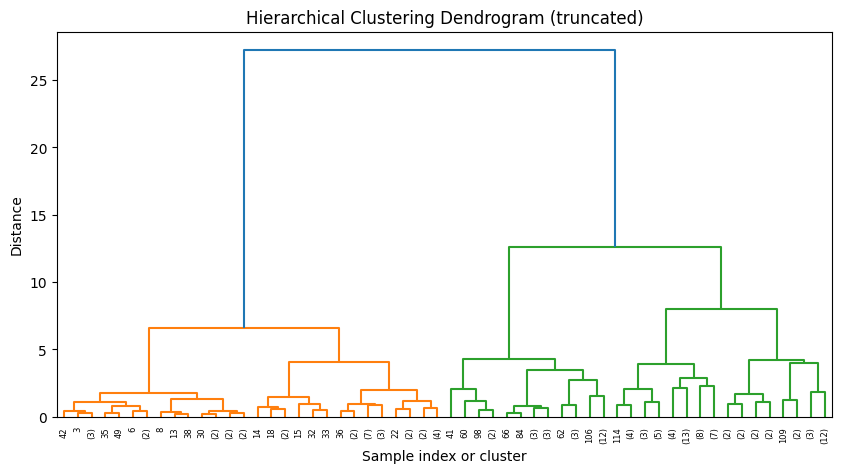

In [31]:
# Dendrogram (use Ward linkage which is similar to KMeans objective in spirit)
plt.figure(figsize=(10, 5))
linked = sch.linkage(X_scaled, method='ward')
sch.dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or cluster')
plt.ylabel('Distance')
plt.show()

In [37]:
# AgglomerativeClustering to obtain labels (choose 3 clusters)
agg = AgglomerativeClustering(n_clusters=3, linkage='ward', metric = 'euclidean')
agg_labels = agg.fit_predict(X_scaled)

print('Cluster counts (Agglomerative):')
print(pd.Series(agg_labels).value_counts().sort_index())


Cluster counts (Agglomerative):
0    71
1    49
2    30
Name: count, dtype: int64


In [35]:
# Evaluate
sil_agg = silhouette_score(X_scaled, agg_labels)
ari_agg = adjusted_rand_score(y_true, agg_labels)
print(f"Silhouette score (Agglomerative): {sil_agg:.4f}")
print(f"Adjusted Rand Index vs true species (Agglomerative): {ari_agg:.4f}")


Silhouette score (Agglomerative): 0.4467
Adjusted Rand Index vs true species (Agglomerative): 0.6153


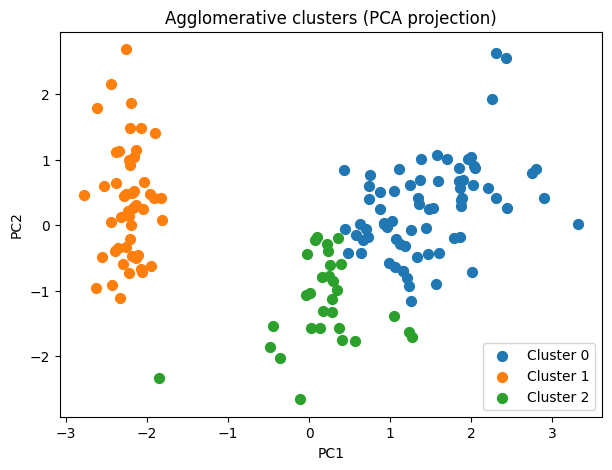

In [36]:
# Visualize Agglomerative clusters using PCA
plt.figure(figsize=(7,5))
for label in np.unique(agg_labels):
    mask = agg_labels == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Cluster {label}', s=50)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative clusters (PCA projection)')
plt.legend()
plt.show()
